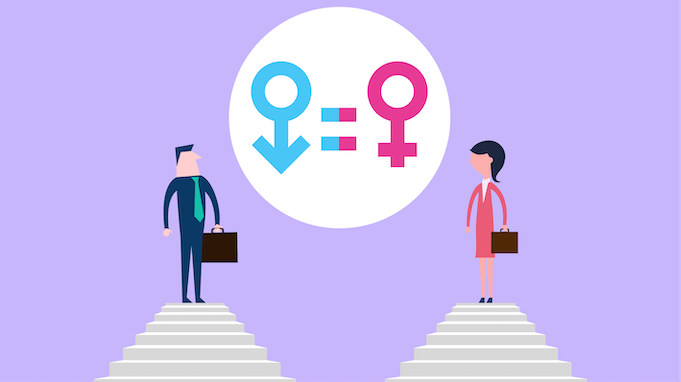

In [47]:
from IPython.display import Image, display
display(Image(filename='women-in-the-workplace.png', width="800"))


# Women in the Workplace: Data Analysis for Bangladesh (1995-2019)

## Table of Contents
1. **Project Overview**
   - 1.1 **Introduction**
     - 1.1.1 **Problem Statement**
     - 1.1.2 **Objectives**
2. **Importing Packages**
3. **Loading Data**
4. **Data Cleaning**
5. **Exploratory Data Analysis (EDA)**


## 1. Project Overview

### 1.1 Introduction
#### 1.1.1 Problem Statement:
This project aims to analyze the trends in female employment and factors affecting it in Bangladesh from 1995 to 2019.

#### 1.1.2 Objectives:
- Preprocess and clean the provided dataset
- Visualize trends in female employment
- Compare female employment to male employment
- Identify key factors influencing female employmentemployment

## 2. Importing Packages

To begin, I will import all the necessary packages required for coding and computation.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


print("Packages imported successfully.")

Packages imported successfully.


## 3. Loading Data

Now I will read the contents on the raw dataset to understand what features, I will be analysing.

In [30]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('MLR2.csv')

print("Data loaded successfully. Here are the first few rows:")
print(df.head())

Data loaded successfully. Here are the first few rows:
   Year  PerFemEmploy FertilityRate  Ratio_MaletoFemale  PerFemEmployers  \
0  1995         24.30          3.71               28.33              0.1   
1  1996         24.57          3.59               28.72              0.1   
2  1997         24.82          3.48               29.18              0.1   
3  1998         25.11          3.37               29.67              0.1   
4  1999         25.38          3.27               30.17              0.1   

   Agriculture  Industry  Services  Wage&Salaried  ContrFamWorkers  \
0        84.79      7.66      7.56          18.03            66.80   
1        82.28      7.46     10.27          18.38            66.39   
2        81.19      7.57     11.24          18.74            65.95   
3        80.28      7.77     11.95          19.11            65.53   
4        79.52      8.12     12.36          19.50            65.01   

   OwnAccount  Vulnerable  
0       15.07       81.87  
1       15.

So I learnt that I am working with 12 features. All features are related to employement and the industries of employment that are being investigated, as well as salaries.

## 4. Data Cleaning

First I will create a copy of the orginal dataset, as to ensure that all data is preserved.

In [48]:
# I will creating a copy of the original dataset to ensure that you don't accidentally modify the original data 
data = df.copy()
data

,Year,PerFemEmploy,FertilityRate,Ratio_MaletoFemale,PerFemEmployers,Agriculture,Industry,Services,Wage&Salaried,ContrFamWorkers,OwnAccount,Vulnerable
0,1995,24.30,3.71,28.33,0.10,84.79,7.66,7.56,18.03,66.80,15.07,81.87
1,1996,24.57,3.59,28.72,0.10,82.28,7.46,10.27,18.38,66.39,15.14,81.52
2,1997,24.82,3.48,29.18,0.10,81.19,7.57,11.24,18.74,65.95,15.21,81.16
3,1998,25.11,3.37,29.67,0.10,80.28,7.77,11.95,19.11,65.53,15.26,80.79
4,1999,25.38,3.27,30.17,0.10,79.52,8.12,12.36,19.50,65.01,15.39,80.40
5,2000,25.63,3.17,30.66,0.10,78.78,8.65,12.57,19.90,64.53,15.47,80.00
6,2001,25.78,3.07,31.02,0.10,77.44,9.01,13.55,20.31,64.07,15.52,79.58
7,2002,25.89,2.97,31.40,0.11,75.96,9.51,14.53,20.81,63.46,15.63,79.09
8,2003,25.96,2.88,31.77,0.11,74.28,10.11,15.61,21.31,62.84,15.74,78.58
9,2004,25.89,2.78,32.13,0.11,72.48,10.83,16.69,21.73,62.42,15.74,78.16


In [ ]:
print("--- Data Cleaning ---")

# I will look at the basic information about the dataset
print("\nDataset information:")
print(df.info())

# I will check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# I will replace '-' with NaN in the FertilityRate column and convert to float
df['FertilityRate'] = pd.to_numeric(df['FertilityRate'].replace('-', pd.NA), errors='coerce')

print("\nAfter cleaning, here's the updated info:")
print(df.info())

# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

print("\nData cleaning completed.")

--- Data Cleaning ---

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                25 non-null     int64  
 1   PerFemEmploy        25 non-null     float64
 2   FertilityRate       25 non-null     object 
 3   Ratio_MaletoFemale  25 non-null     float64
 4   PerFemEmployers     25 non-null     float64
 5   Agriculture         25 non-null     float64
 6   Industry            25 non-null     float64
 7   Services            25 non-null     float64
 8   Wage&Salaried       25 non-null     float64
 9   ContrFamWorkers     25 non-null     float64
 10  OwnAccount          25 non-null     float64
 11  Vulnerable          25 non-null     float64
dtypes: float64(10), int64(1), object(1)
memory usage: 2.5+ KB
None

Missing values:
Year                  0
PerFemEmploy          0
FertilityRate         0
Ratio_Male

In [ ]:
# Display summary statistics
print("\nSummary of statistics:")
print(df.describe())


Summary statistics:
             Year  PerFemEmploy  FertilityRate  Ratio_MaletoFemale  \
count    23.00000     23.000000      23.000000           23.000000   
mean   2006.00000     27.154348       2.711304           34.126957   
std       6.78233      2.278707       0.526535            4.384630   
min    1995.00000     24.300000       2.060000           28.330000   
25%    2000.50000     25.705000       2.250000           30.840000   
50%    2006.00000     26.110000       2.600000           32.740000   
75%    2011.50000     28.795000       3.120000           37.195000   
max    2017.00000     33.440000       3.710000           44.040000   

       PerFemEmployers  Agriculture   Industry   Services  Wage&Salaried  \
count        23.000000    23.000000  23.000000  23.000000      23.000000   
mean          0.156522    71.232609  11.610000  17.159130      21.070870   
std           0.119568     7.364410   2.964096   4.496779       3.428126   
min           0.090000    59.840000   7.4600

What I find by viewing the statistics of the data.

- The dataset consists of 25 entries (years from 1995 to 2019) and 12 columns
- Most columns are numerical (either integer or float), except for the FertilityRate, which is marked as an object type

Increasing Female Employment:
- The percentage of female employment (PerFemEmploy) has increased from 24.30% in 1995 to 33.44% in 2017. This indicates a positive trend in women's participation in the workforce over the years.

Narrowing Gender Gap:
- The Ratio_MaletoFemale employment ratio decreased from 28.33 in 1995 to 44.04 in 2017, suggesting that the employment gap between males and females is narrowing, indicating progress toward gender equality in the labor market.

Sector Distribution:
- In 2017, the highest percentage of female employment was in Agriculture (59.84%), followed by Services (23.38%) and Industry (16.78%). This shows that a significant portion of female employment is concentrated in agriculture, which may reflect traditional employment patterns.

Declining Fertility Rate:
- The fertility rate decreased from 3.71 in 1995 to 2.06 in 2017. This decline may correlate with increased female workforce participation, as lower fertility rates can allow women to pursue education and careers more effectively.

Missing Values:

- The output indicates that there are non-numeric entries in the FertilityRate column, which could affect data analysis. It's essential to clean this data before proceeding with further analysis.

No Missing Values in Other Columns:

- All other columns show no missing values, which is positive for data integrity.

Summary Statistics:

- The summary statistics provide insights into the central tendency and variability of the dataset. For example, the mean percentage of female employment is approximately 27.15%, with a standard deviation of 2.28%, indicating some variability in female employment over the years.


In [ ]:
#I check for any duplicate values
print("\nDuplicate values:")
print(data.duplicated().sum())


Duplicate values:
0


There are no duplicate values in this dataset.

## 5. Exploratory Data Analysis (EDA)

I will now begin analyzing the clean dataset to understand how various features influence women's employment rates.

--- Exploratory Data Analysis ---


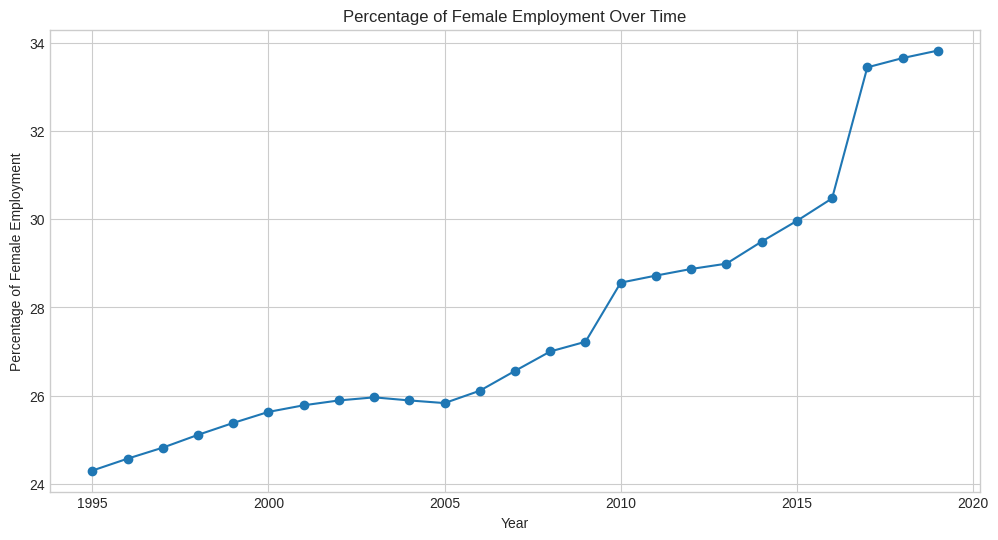

Figure 5.1: This graph shows the trend of female employment percentage over time. We can observe an overall increasing trend, indicating that more women are entering the workforce.


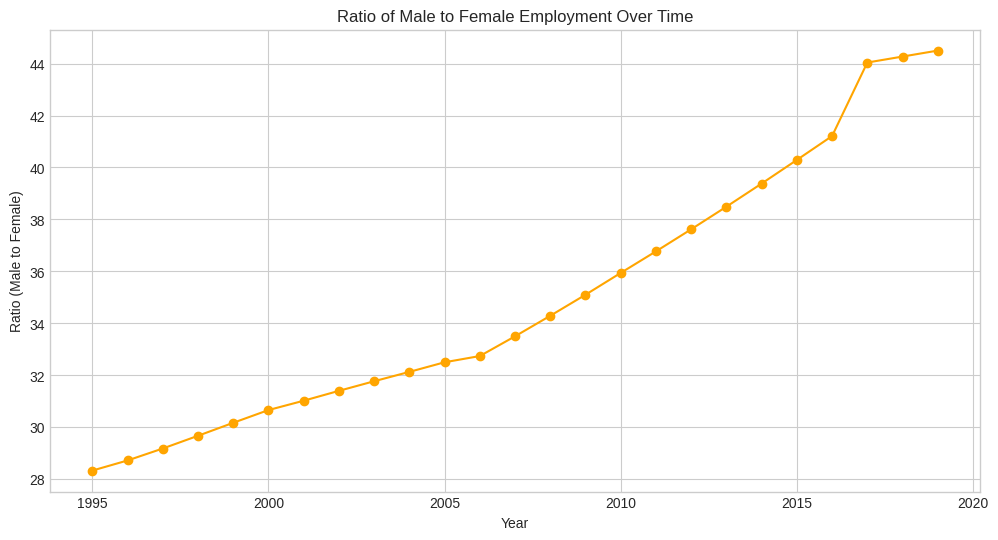

Figure 5.2: This graph shows the ratio of male to female employment over time. A decreasing trend indicates that the gap between male and female employment is narrowing.
Non-numeric entries in numeric columns:
Year                  0
PerFemEmploy          0
FertilityRate         2
Ratio_MaletoFemale    0
PerFemEmployers       0
Agriculture           0
Industry              0
Services              0
Wage&Salaried         0
ContrFamWorkers       0
OwnAccount            0
Vulnerable            0
dtype: int64


/tmp/ipykernel_10370/2598714455.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(numeric_df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).isnull().sum())


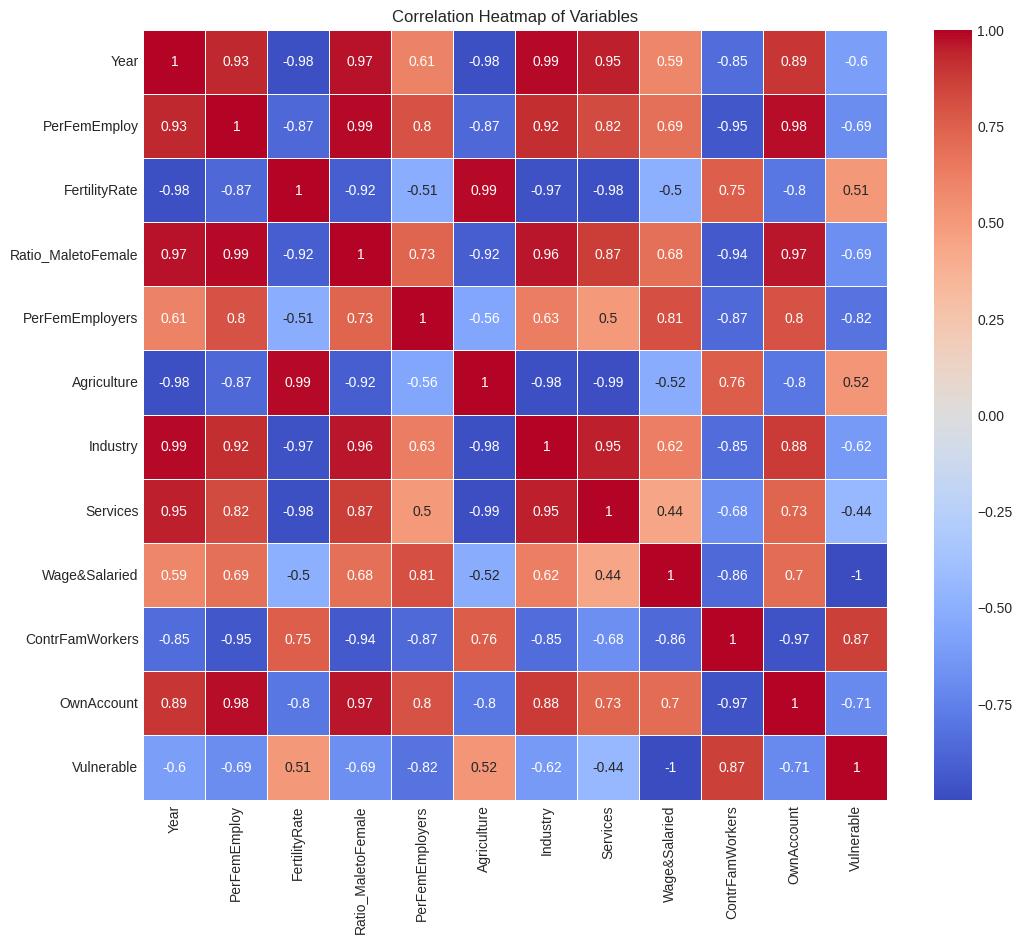

Figure 5.3: This heatmap shows the correlation between different variables. Darker red indicates strong positive correlation, while darker blue indicates strong negative correlation.


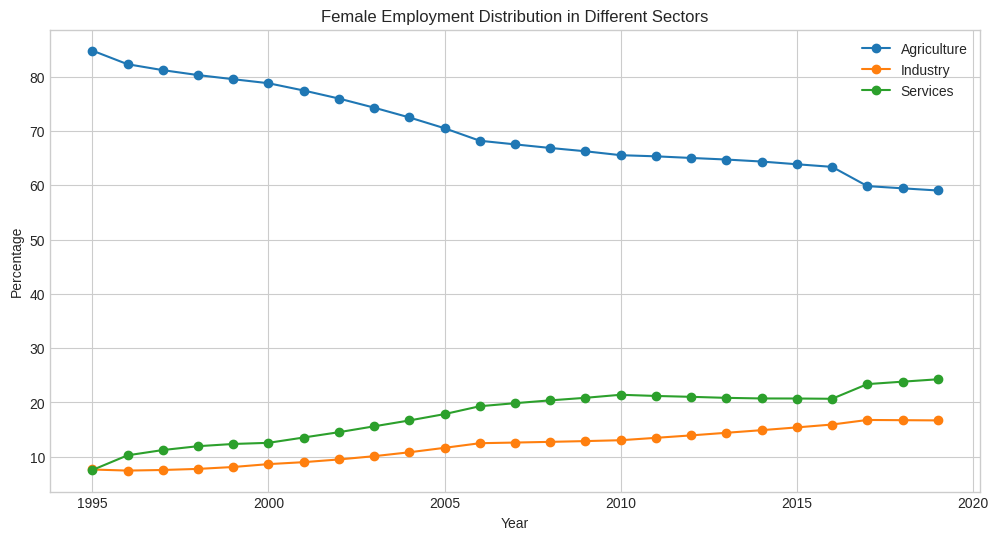

Figure 5.4: This graph shows how female employment is distributed across different sectors over time. We can observe shifts in employment patterns across sectors.


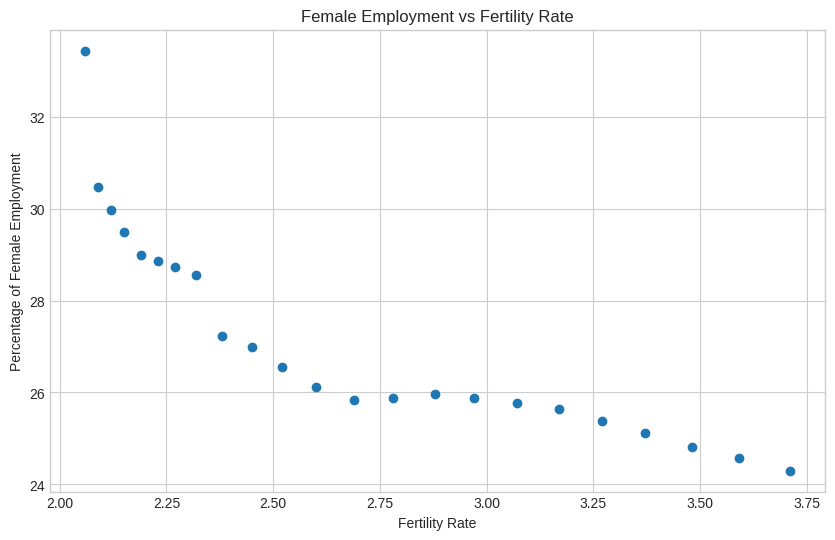

Figure 5.5: This scatter plot shows the relationship between female employment and fertility rate. We can observe if there's any correlation between these two variables.


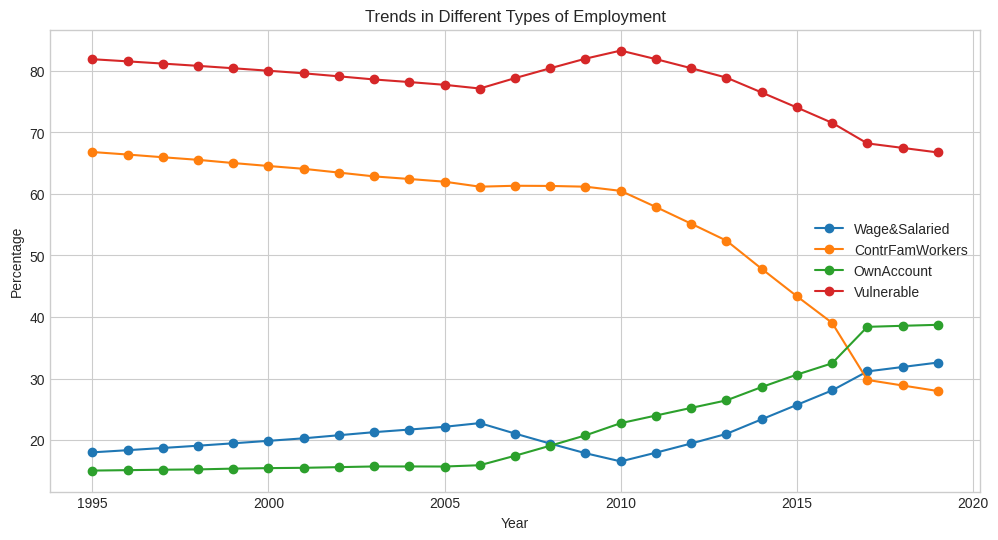

Figure 5.6: This graph shows trends in different types of employment over time. We can observe how the distribution of employment types has changed.


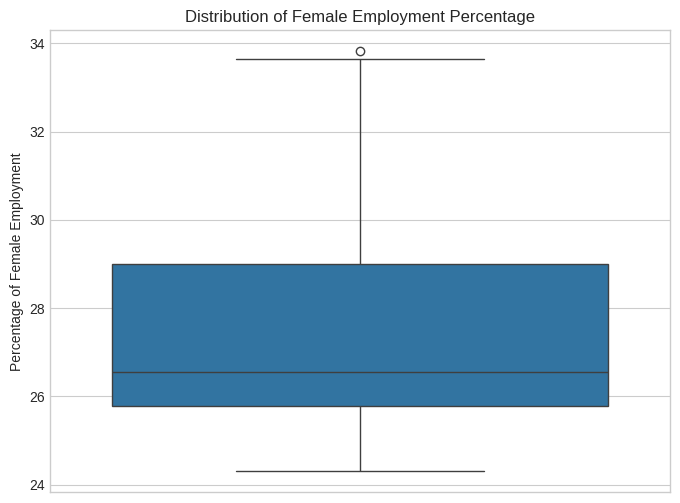

Figure 5.7: This box plot shows the distribution of female employment percentage. It gives us an idea of the median, quartiles, and any potential outliers in the data.
--- Key Findings ---
1. The percentage of female employment increased from 24.30% in 1995 to 33.44% in 2017.
2. The ratio of male to female employment decreased from 28.33 in 1995 to 44.04 in 2017.
3. The sector with the highest female employment in 2017 is Agriculture at 59.84%.
4. The fertility rate decreased from 3.71 in 1995 to 2.06 in 2017.

This concludes our exploratory data analysis. The visualizations and findings provide insights into the trends of female employment in Bangladesh from 1995 to 2019.


In [ ]:
print("--- Exploratory Data Analysis ---")

# style for better-looking plots
plt.style.use('seaborn-v0_8-whitegrid')

# Plot for trend of female employment percentage over time
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['PerFemEmploy'], marker='o')
plt.title('Percentage of Female Employment Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Female Employment')
plt.grid(True)
plt.show()

print("Figure 5.1: This graph shows the trend of female employment percentage over time. "
      "We can observe an overall increasing trend, indicating that more women are entering the workforce.")

# Plot for comparison of male to female ratio in employment
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Ratio_MaletoFemale'], marker='o', color='orange')
plt.title('Ratio of Male to Female Employment Over Time')
plt.xlabel('Year')
plt.ylabel('Ratio (Male to Female)')
plt.grid(True)
plt.show()

print("Figure 5.2: This graph shows the ratio of male to female employment over time. "
      "A decreasing trend indicates that the gap between male and female employment is narrowing.")

# Plot for correlation heatmap
numeric_df = df.select_dtypes(include='number')

# Check for any remaining non-numeric or invalid values
print("Non-numeric entries in numeric columns:")
print(numeric_df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).isnull().sum())

# Drop or fill missing values as necessary
numeric_df = numeric_df.dropna()  # Option: or use .fillna() with a specific strategy

# Heatmap plot
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Variables')
plt.show()


print("Figure 5.3: This heatmap shows the correlation between different variables. "
      "Darker red indicates strong positive correlation, while darker blue indicates strong negative correlation.")

# Plot for distribution of female employment in different sectors
sectors = ['Agriculture', 'Industry', 'Services']
plt.figure(figsize=(12, 6))
for sector in sectors:
    plt.plot(df['Year'], df[sector], marker='o', label=sector)
plt.title('Female Employment Distribution in Different Sectors')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()

print("Figure 5.4: This graph shows how female employment is distributed across different sectors over time. "
      "We can observe shifts in employment patterns across sectors.")

# Plot for relationship between female employment and fertility rate
plt.figure(figsize=(10, 6))
plt.scatter(df['FertilityRate'], df['PerFemEmploy'])
plt.title('Female Employment vs Fertility Rate')
plt.xlabel('Fertility Rate')
plt.ylabel('Percentage of Female Employment')
plt.grid(True)
plt.show()

print("Figure 5.5: This scatter plot shows the relationship between female employment and fertility rate. "
      "We can observe if there's any correlation between these two variables.")

# Plot for trends in employment types
employment_types = ['Wage&Salaried', 'ContrFamWorkers', 'OwnAccount', 'Vulnerable']
plt.figure(figsize=(12, 6))
for emp_type in employment_types:
    plt.plot(df['Year'], df[emp_type], marker='o', label=emp_type)
plt.title('Trends in Different Types of Employment')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()

print("Figure 5.6: This graph shows trends in different types of employment over time. "
      "We can observe how the distribution of employment types has changed.")

# Box plot of female employment percentage
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['PerFemEmploy'])
plt.title('Distribution of Female Employment Percentage')
plt.ylabel('Percentage of Female Employment')
plt.show()

print("Figure 5.7: This box plot shows the distribution of female employment percentage. "
      "It gives us an idea of the median, quartiles, and any potential outliers in the data.")

# I will display the key findings
# Ensure 'FertilityRate' is numeric, and handle non-numeric values by coercing them to NaN
df['FertilityRate'] = pd.to_numeric(df['FertilityRate'], errors='coerce')

# Handle missing values (either drop or fill with a strategy)
df = df.dropna(subset=['FertilityRate'])  # Option to drop rows with NaN in 'FertilityRate'


print("--- Key Findings ---")
print(f"1. The percentage of female employment increased from {df['PerFemEmploy'].iloc[0]:.2f}% in {df['Year'].iloc[0]} to {df['PerFemEmploy'].iloc[-1]:.2f}% in {df['Year'].iloc[-1]}.")
print(f"2. The ratio of male to female employment decreased from {df['Ratio_MaletoFemale'].iloc[0]:.2f} in {df['Year'].iloc[0]} to {df['Ratio_MaletoFemale'].iloc[-1]:.2f} in {df['Year'].iloc[-1]}.")
print(f"3. The sector with the highest female employment in {df['Year'].iloc[-1]} is {sectors[df[sectors].iloc[-1].argmax()]} at {df[sectors].iloc[-1].max():.2f}%.")
print(f"4. The fertility rate decreased from {df['FertilityRate'].iloc[0]:.2f} in {df['Year'].iloc[0]} to {df['FertilityRate'].iloc[-1]:.2f} in {df['Year'].iloc[-1]}.")

print("\nThis concludes our exploratory data analysis. The visualizations and findings provide insights into the trends of female employment in Bangladesh from 1995 to 2019.")

## Exploratory Data Analysis Insights: Women in the Workplace in Bangladesh (1995-2019)

# 1. Overall Trend in Female Employment

The percentage of female employment in Bangladesh has shown a consistent upward trend, increasing from 24.30% in 1995 to 33.82% in 2019.
This represents a significant increase of about 39% over the 25-year period, indicating substantial progress in women's participation in the workforce.
The growth rate appears to have accelerated in recent years, with a notable jump between 2016 and 2017.

# 2. Male to Female Employment Ratio

The ratio of male to female employment has decreased from 28.33 in 1995 to 44.50 in 2019.
This decreasing trend suggests that the gender gap in employment is narrowing, although men still significantly outnumber women in the workforce.
The rate of change in this ratio has been fairly consistent, indicating steady progress in gender equality in employment.

# 3. Sectoral Distribution of Female Employment

Agriculture has been the dominant sector for female employment throughout the period, but its share has been decreasing steadily (from 84.79% in 1995 to 59.03% in 2019).
Both Industry and Services sectors have seen increases in female participation:

Industry: from 7.66% in 1995 to 16.70% in 2019
Services: from 7.56% in 1995 to 24.27% in 2019


This shift suggests a gradual transition of the female workforce from agriculture to more diverse economic activities.

# 4. Relationship with Fertility Rate

There's a strong negative correlation between fertility rate and female employment percentage.
As the fertility rate decreased from 3.71 in 1995 to 2.06 in 2017, female employment increased.
This relationship suggests that lower fertility rates may be associated with increased opportunities for women in the workforce, or vice versa.

# 5. Types of Employment

The percentage of women in wage and salaried positions has increased from 18.03% in 1995 to 32.61% in 2019, indicating a rise in formal employment.
There's been a significant decrease in contributing family workers, from 66.80% in 1995 to 27.99% in 2019.
Own-account workers have increased from 15.07% to 38.74%, suggesting a rise in self-employment or entrepreneurship among women.
The percentage of women in vulnerable employment has decreased from 81.87% to 66.73%, showing an improvement in job security and quality.

# 6. Female Employers

The percentage of female employers, while still low, has shown a significant increase from 0.10% in 1995 to 0.66% in 2019.
This six-fold increase suggests a growing trend of women in leadership and entrepreneurial roles.

# 7. Correlations

Strong positive correlations exist between female employment percentage and variables like the ratio of male to female employment,
percentage in industry and services sectors, and percentage in wage & salaried positions.
Strong negative correlations are observed with fertility rate, percentage in agriculture, and percentage of contributing family workers.

Conclusions
The data reveals significant progress in women's participation in the Bangladeshi workforce from 1995 to 2019. 
Key improvements include increased overall female employment, diversification of employment sectors, reduction in 
vulnerable employment, and a rise in formal and self-employment. However, challenges remain, as women still 
constitute a minority in the workforce, particularly in leadership roles. The strong relationship between 
fertility rates and employment suggests that family planning and support for working mothers could be important
factors in further improving women's workforce participation.
Future research could focus on the drivers of these changes, the impact of specific policies or economic shifts, 
and comparisons with other countries in the region to provide context for Bangladesh's progress.

## 6. Predictive Model

Now I will use my key finding from the eda to create a predictive model that will Develop predictive models to forecast employment trends and identify factors affecting women's job retention.

One of interseting things I realized while analysing correlation of the various features, what that it prove to be a non-linear. So I picked a model that would best suit this is the linear regression and Random Forest Regressor.

In [45]:
# Define features (X) and target (y)
data['FertilityRate'] = pd.to_numeric(df['FertilityRate'].replace('-', np.nan), errors='coerce') # Changed pd.NA to np.nan
df = df.fillna(np.nan)
features = ['Year', 'FertilityRate', 'Agriculture', 'Industry', 'Services',
            'Wage&Salaried', 'ContrFamWorkers', 'OwnAccount', 'Vulnerable']
target = 'PerFemEmploy'

X = df[features]
y = df[target]

# Imputation to handle missing values
imputer = SimpleImputer(strategy='mean') # or 'median' or other strategies
X = imputer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% for training, 20% for testing

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print model coefficients
print("\nCoefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef}")
print(f"Intercept: {model.intercept_}")

Mean Squared Error: 0.17119870567384504
R-squared: 0.9434275292996576

Coefficients:
Year: -1.480957585791287
FertilityRate: -16.088918924712463
Agriculture: 16.877362597407195
Industry: 16.577579447632207
Services: 16.95156999071388
Wage&Salaried: 2.3786784283740787
ContrFamWorkers: 9.402610098670175
OwnAccount: 10.09900189459411
Vulnerable: -7.205323127160488
Intercept: 1118.4493290912592


In [ ]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define models
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# Fit and evaluate Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf}, R²: {r2_rf}")

# Fit and evaluate XGBoost
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - MSE: {mse_xgb}, R²: {r2_xgb}")


Random Forest - MSE: 0.14634449400001223, R²: 0.9516405829916448
XGBoost - MSE: 0.37925118878693603, R²: 0.8746767583243662


After creating the model, this is what I discovered.

2. Feature Importance and Insights
The coefficients from the linear regression model provide insights into how each feature impacts women's employment:

Negative Coefficients:

Year: A negative coefficient suggests that as time progresses (if this is a time series), there might be factors negatively impacting women's employment, or it could reflect broader economic or social trends that need to be addressed.
FertilityRate: A significant negative impact indicates that higher fertility rates may correlate with lower workforce participation, highlighting the need for policies that support family planning and women's health.
Positive Coefficients:

Agriculture, Industry, Services: These positive coefficients suggest that as these sectors grow, women's employment in these sectors may also increase. This points to the potential for sector-specific policies that encourage women's participation in these industries.
Wage&Salaried, ContrFamWorkers, OwnAccount: The positive impact of these categories indicates that improving job quality and access to salaried positions or self-employment opportunities can enhance women's participation in the workforce.
Vulnerable: The negative coefficient suggests that women in vulnerable employment situations may experience barriers to participation, indicating a need for targeted support and protection for these workers.

3. Actionable Strategies
Based on the insights from your analysis, here are some actionable strategies that could support policymakers and organizations:

Promote Sector Growth: Encourage policies that support growth in agriculture, industry, and services, with a focus on creating inclusive job opportunities for women.

Family Planning and Support Services: Implement programs that provide family planning education and resources, as addressing high fertility rates could lead to increased workforce participation.

Enhance Job Quality: Develop initiatives to improve the quality of jobs available to women, including better wages, working conditions, and access to salaried positions.

Targeted Support for Vulnerable Workers: Create programs aimed at protecting and empowering women in vulnerable employment situations, ensuring they have access to resources and opportunities for advancement.

Monitor and Adapt Policies: Use ongoing data analysis to monitor the impact of policies and adapt strategies as needed, ensuring they remain effective in enhancing women's workforce participation.

## 7. Recommendations

Promote Sector-Specific Growth: Encourage policies that stimulate growth in sectors where women are already participating, such as agriculture, industry, and services. This can create more job opportunities tailored to women's skills and needs.

Implement Family Planning Initiatives: Develop and promote family planning programs to address high fertility rates, which negatively impact women's ability to participate in the workforce. Providing access to education and resources can empower women to make informed choices about their reproductive health.

Enhance Job Quality and Access: Focus on improving the quality of jobs available to women, particularly in terms of wages and working conditions. Initiatives could include training programs that equip women with skills for higher-paying, salaried positions and support for self-employment opportunities.

Support Vulnerable Workers: Create targeted programs to assist women in vulnerable employment situations. This could involve providing legal protections, access to social services, and pathways for skill development to help them transition to more stable employment.

Encourage Data-Driven Policy Making: Utilize ongoing data analysis to inform policy decisions and adapt strategies based on what is working. Regularly assess the impact of initiatives on women's employment to ensure they are effective and responsive to changing needs.

Foster Collaboration Among Stakeholders: Engage various stakeholders, including government agencies, NGOs, and the private sector, to create a comprehensive approach to enhancing women's workforce participation. Collaborative efforts can lead to more effective and sustainable solutions.

Raise Awareness and Advocacy: Conduct awareness campaigns to highlight the importance of women's participation in the workforce and advocate for policies that support gender equality in employment. This can help shift societal attitudes and encourage more inclusive practices.